In [16]:
import numpy as np
import pandas as pd
import sklearn
import seaborn
import xgboost
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

In [17]:
df=pd.read_csv('dataset.csv')
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [18]:
df.info()
# print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [19]:
# Modificar la columna 'Target'
df['Target'] = df['Target'].apply(lambda x: 'No_dropout' if x != 'Dropout' else 'Dropout')

In [24]:
df.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,1
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,1
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,1


In [20]:
label_encoder = LabelEncoder()
df['Target'] = label_encoder.fit_transform(df['Target'])

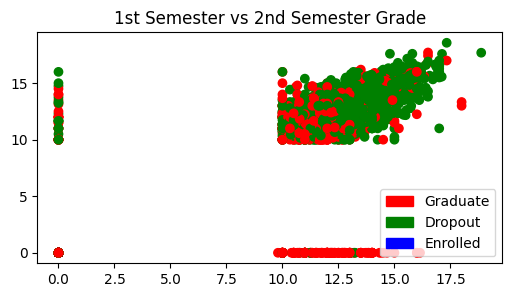

In [22]:
plt.figure(figsize=(6,3))
colors=np.array(['red','green','blue'])
red_patch=mpatches.Patch(color='red',label='Graduate' )
green_patch=mpatches.Patch(color='green',label='Dropout' )
# blue_patch=mpatches.Patch(color='blue',label='Enrolled' )

plt.scatter( df["Curricular units 1st sem (grade)"],df["Curricular units 2nd sem (grade)"],c=colors[df['Target']])
plt.title("1st Semester vs 2nd Semester Grade")
plt.legend(handles =[red_patch,green_patch,blue_patch])

In [25]:
X = df.values[:, 0:34]
Y = df.values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [26]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [27]:
KNN = KNeighborsClassifier(n_neighbors=14)
KNN.fit(X_train, y_train)
y_pred = KNN.predict(X_test)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred)*100)

Confusion Matrix:  [[186 130]
 [ 21 548]]
Accuracy :  82.93785310734462


0.18983050847457628
0.21807909604519773
0.17288135593220338
0.16271186440677965
0.17627118644067796
0.16497175141242937
0.1672316384180791
0.16497175141242937
0.17966101694915254
0.17401129943502824
0.17853107344632768
0.1694915254237288
0.17401129943502824
0.17062146892655367
0.18305084745762712
0.17853107344632768
0.1807909604519774
0.17853107344632768
0.18757062146892656
0.1807909604519774
0.1864406779661017
0.18418079096045198
0.18531073446327684
0.18531073446327684
0.18757062146892656
0.1864406779661017
0.18983050847457628
0.18757062146892656
0.192090395480226
0.18983050847457628
0.19096045197740114
0.18983050847457628
0.19096045197740114
0.18870056497175142
0.19322033898305085
0.19096045197740114
0.192090395480226
0.192090395480226
0.192090395480226


Text(0, 0.5, 'Mean Error')

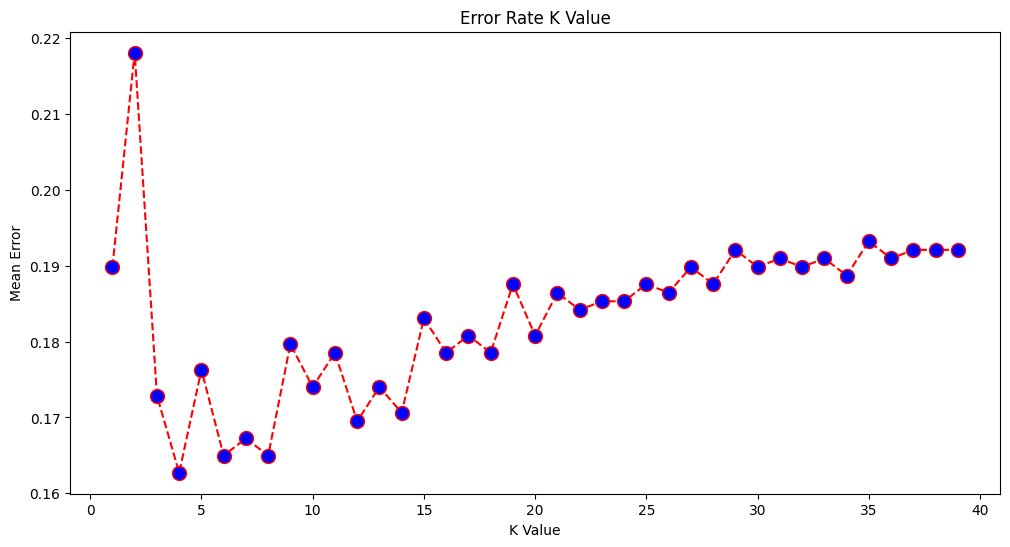

In [28]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    print(np.mean(pred_i != y_test))
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [29]:
clf_gini = DecisionTreeClassifier(criterion="gini", random_state=100, max_depth=3, min_samples_leaf=5)
clf_gini.fit(X_train, y_train)
y_pred = clf_gini.predict(X_test)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred)*100)

Confusion Matrix:  [[193 123]
 [ 21 548]]
Accuracy :  83.72881355932203


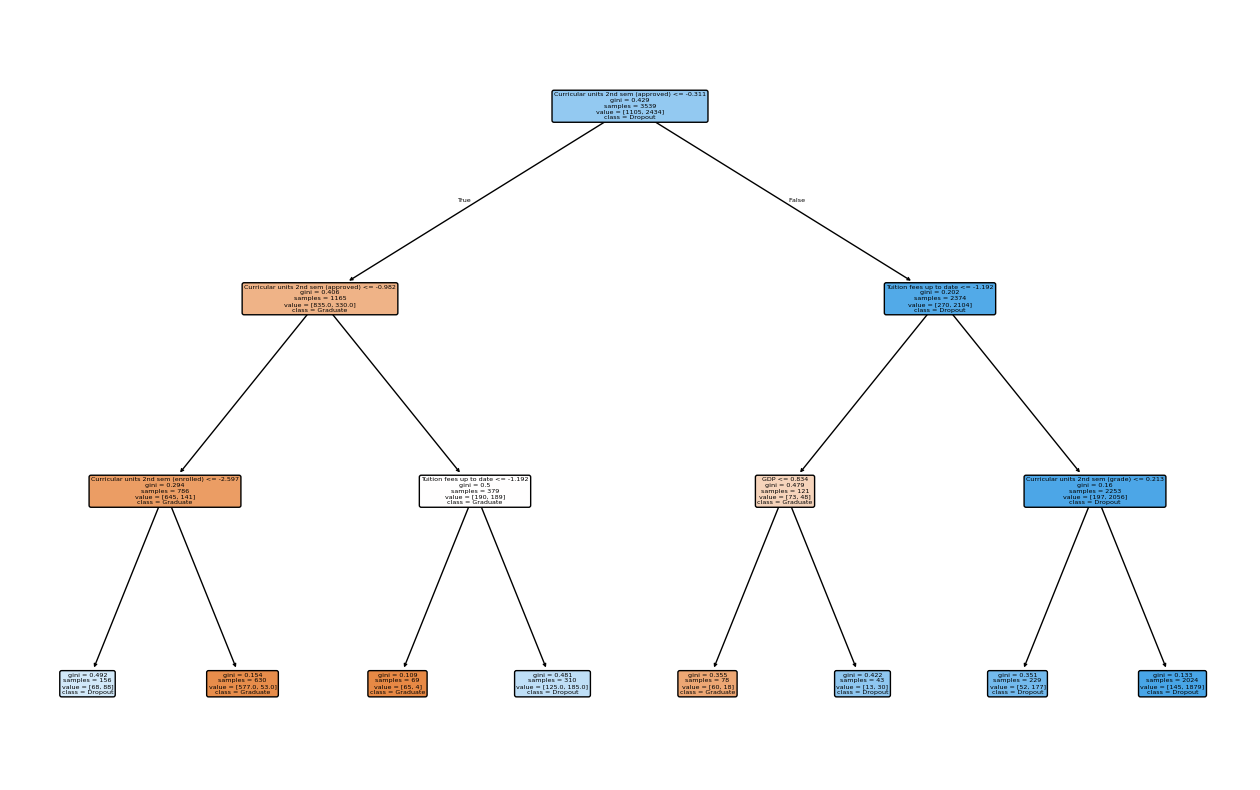

In [30]:
plt.figure(figsize=(16, 10))
tree.plot_tree(clf_gini, filled=True, feature_names=list(df.columns), class_names=['Graduate','Dropout','Enrolled'], rounded=True)
plt.show()

In [31]:
clf_entropy = DecisionTreeClassifier(criterion="entropy", random_state=100, max_depth=3, min_samples_leaf=5)
clf_entropy.fit(X_train, y_train)
y_pred = clf_entropy.predict(X_test)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred)*100)

Confusion Matrix:  [[202 114]
 [ 36 533]]
Accuracy :  83.05084745762711


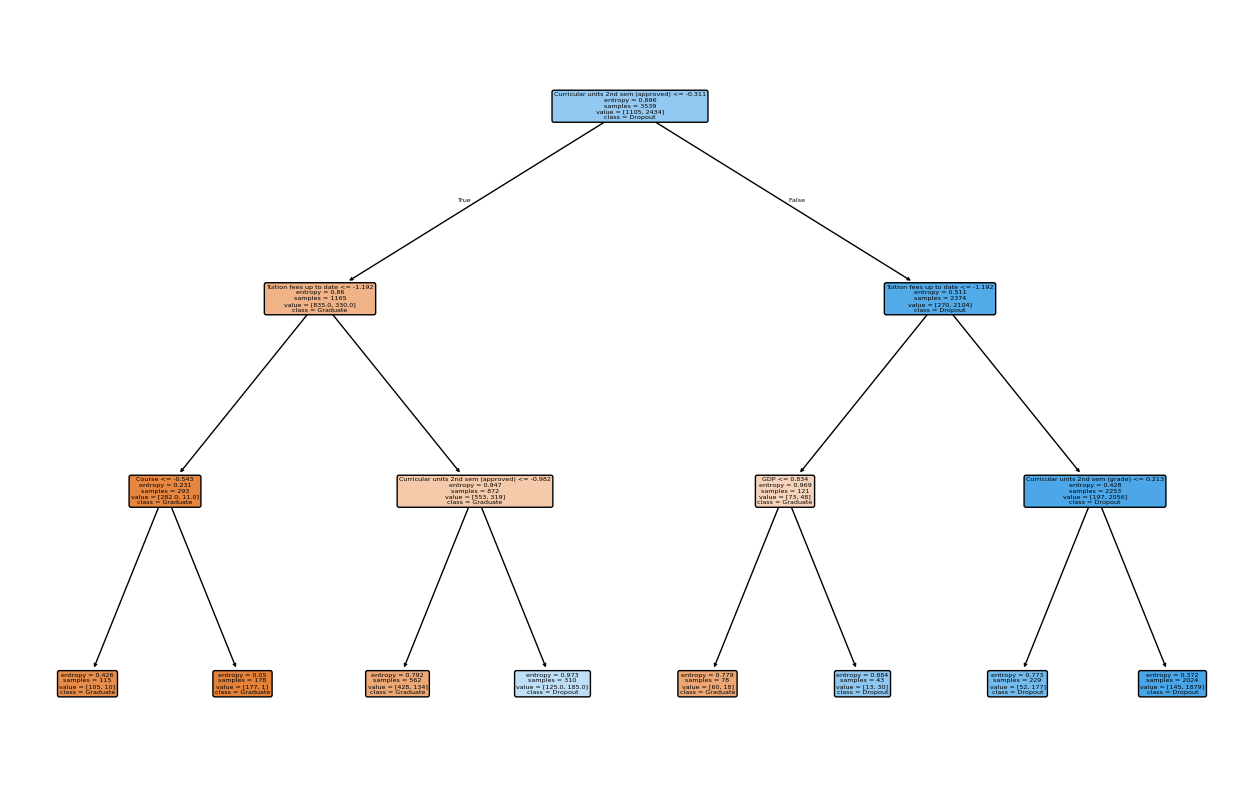

In [32]:
plt.figure(figsize=(16, 10))
tree.plot_tree(clf_entropy, filled=True, feature_names=list(df.columns), class_names=['Graduate','Dropout','Enrolled'], rounded=True)
plt.show()

In [33]:
#tree buscando mejores hiperparametros
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define el modelo base
clf = DecisionTreeClassifier(random_state=100)

# Define un rango más amplio de hiperparámetros
param_grid = {
    'criterion': ['gini', 'entropy'],  # Función de evaluación
    'splitter': ['best', 'random'],  # Estrategia para dividir nodos
    'max_depth': [None, 5, 10, 20, 50, 100],  # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10, 20, 50],  # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 5, 10, 20],  # Mínimo de muestras en una hoja
    'max_features': [None, 'sqrt', 'log2'],  # Número máximo de características a considerar
    'max_leaf_nodes': [None, 10, 20, 50, 100],  # Número máximo de nodos hoja
}

# Configura GridSearchCV con validación cruzada
grid_search = GridSearchCV(
    estimator=clf,
    param_grid=param_grid,
    cv=5,  # Validación cruzada con 5 particiones
    scoring='accuracy',  # Métrica de evaluación
    verbose=3,  # Más detalle en la salida
    n_jobs=-1  # Usa todos los núcleos disponibles
)
# Ejecuta la búsqueda
grid_search.fit(X_train, y_train)

# Imprime los mejores parámetros y el mejor puntaje
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor precisión:", grid_search.best_score_)

# Usa el mejor modelo encontrado
best_clf = grid_search.best_estimator_

# Evalúa en el conjunto de prueba
y_pred = best_clf.predict(X_test)
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("Accuracy en test:", accuracy_score(y_test, y_pred) * 100)

Fitting 5 folds for each of 9000 candidates, totalling 45000 fits
Mejores parámetros encontrados: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}
Mejor precisión: 0.8734127650053141
Confusion Matrix: [[215 101]
 [ 36 533]]
Accuracy en test: 84.51977401129943


In [34]:
svm_clf = svm.SVC(kernel='linear')
svm_clf.fit(X_train, y_train)
y_pred = svm_clf.predict(X_test)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred)*100)

Confusion Matrix:  [[219  97]
 [ 29 540]]
Accuracy :  85.76271186440678


In [35]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC

# Define el modelo base
svm_clf = SVC()

# Define el rango de hiperparámetros
param_dist = {
    'C': [0.1, 1, 10, 100, 1000],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto', 0.01, 0.1],
    'degree': [2, 3, 4],
}

# Configura RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=svm_clf,
    param_distributions=param_dist,
    n_iter=20,  # Número de combinaciones aleatorias a probar
    cv=3,  # Validación cruzada con 3 particiones
    scoring='accuracy',
    verbose=3,
    n_jobs=-1,  # Usa todos los núcleos disponibles
    random_state=42
)

# Ejecuta la búsqueda
random_search.fit(X_train, y_train)

# Imprime los mejores parámetros y el mejor puntaje
print("Mejores parámetros encontrados:", random_search.best_params_)
print("Mejor precisión:", random_search.best_score_)

# Usa el mejor modelo encontrado
best_svm = random_search.best_estimator_

# Evalúa en el conjunto de prueba
y_pred = best_svm.predict(X_test)
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("Accuracy en test:", accuracy_score(y_test, y_pred) * 100)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Mejores parámetros encontrados: {'kernel': 'linear', 'gamma': 0.1, 'degree': 2, 'C': 1000}
Mejor precisión: 0.8784960921589205
Confusion Matrix: [[220  96]
 [ 29 540]]
Accuracy en test: 85.87570621468926


In [36]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train, y_train)
y_pred = rf_clf.predict(X_test)

print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)

Confusion Matrix: [[227  89]
 [ 35 534]]
Accuracy: 85.98870056497175


In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

# Define el modelo base
rf_clf = RandomForestClassifier(random_state=42)

# Define un rango más limitado de hiperparámetros
param_grid = {
    'n_estimators': [100, 300, 500],  # Reduce el número de árboles evaluados
    'max_depth': [10, 20, 50, None],  # Limita las profundidades máximas
    'min_samples_split': [2, 5, 10],  # Reduce las opciones para dividir nodos
    'min_samples_leaf': [1, 2, 4],  # Reduce las opciones para hojas mínimas
    'max_features': ['sqrt', 'log2'],  # Excluye `None` para simplificar
    'bootstrap': [True, False],  # Mantén ambas opciones para bootstrap
}

# Configura GridSearchCV
grid_search = GridSearchCV(
    estimator=rf_clf,
    param_grid=param_grid,
    cv=3,  # Reduce las particiones de validación cruzada
    scoring='accuracy',  # Métrica de evaluación
    verbose=3,  # Más detalle en la salida
    n_jobs=-1  # Usa todos los núcleos disponibles
)

# Ejecuta la búsqueda
grid_search.fit(X_train, y_train)

# Imprime los mejores parámetros y el mejor puntaje
print("Mejores parámetros encontrados:", grid_search.best_params_)
print("Mejor precisión:", grid_search.best_score_)

# Usa el mejor modelo encontrado
best_rf = grid_search.best_estimator_

# Evalúa en el conjunto de prueba
y_pred = best_rf.predict(X_test)
print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("Accuracy en test:", accuracy_score(y_test, y_pred) * 100)

Fitting 3 folds for each of 432 candidates, totalling 1296 fits
Mejores parámetros encontrados: {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mejor precisión: 0.884995902876612
Confusion Matrix: [[226  90]
 [ 38 531]]
Accuracy en test: 85.53672316384181


In [38]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(random_state=42)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)

print("Confusion Matrix:", confusion_matrix(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred) * 100)

Confusion Matrix: [[230  86]
 [ 42 527]]
Accuracy: 85.53672316384181


In [39]:
ksvm_clf = svm.SVC(kernel='rbf', gamma=0.1, C=10.0)
ksvm_clf.fit(X_train, y_train)
y_pred = ksvm_clf.predict(X_test)
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))
print("Accuracy : ", accuracy_score(y_test, y_pred)*100)

Confusion Matrix:  [[224  92]
 [ 50 519]]
Accuracy :  83.954802259887


In [41]:
import joblib

# Guarda el modelo entrenado
joblib.dump(rf_clf, 'svm_model.pkl')

['svm_model.pkl']